In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/3- Summer 2022/Data Mining/Data Mining Project/Dataset/Dhaka Stock Exchange Broad Historical Data.csv", thousands=',')

In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 17, 2022",6241.44,6241.44,6241.44,6241.44,NaN,0.25%
1,"Aug 16, 2022",6225.91,6225.91,6225.91,6225.91,NaN,1.25%
2,"Aug 11, 2022",6148.77,6148.77,6148.77,6148.77,NaN,-0.52%
3,"Aug 10, 2022",6180.90,6180.90,6180.90,6180.90,NaN,-1.25%
4,"Aug 08, 2022",6258.95,6258.95,6258.95,6258.95,NaN,-0.84%


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df_date = df['Date']
df_date

0      2022-08-17
1      2022-08-16
2      2022-08-11
3      2022-08-10
4      2022-08-08
          ...    
2257   2013-02-05
2258   2013-02-04
2259   2013-02-03
2260   2013-01-31
2261   2013-01-30
Name: Date, Length: 2262, dtype: datetime64[ns]

In [ ]:
df=df.drop(columns='Vol.')
df=df.drop(columns='Change %')
df=df.drop(columns='Date')

## Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
dft=sc.fit_transform(df)

## Feature Extraction

In [ ]:
dft=pd.DataFrame(dft,columns=['Price','Open',	'High',	'Low'])

In [ ]:
dft.shape

(2262, 4)

In [ ]:
from sklearn.model_selection import train_test_split
y=dft['Price']
X=dft.iloc[:,1:]

X_open = dft['Open']

X_high_low = dft.iloc[:,2: ]

X.head()

,Open,High,Low
0,0.713280,0.705625,0.717497
1,0.709328,0.701714,0.713521
2,0.689695,0.682292,0.693772
3,0.697872,0.690382,0.701998
4,0.717737,0.710033,0.721980


In [ ]:
X_open.head()

0    0.713280
1    0.709328
2    0.689695
3    0.697872
4    0.717737
Name: Open, dtype: float64

In [ ]:
X_high_low.head()

,High,Low
0,0.705625,0.717497
1,0.701714,0.713521
2,0.682292,0.693772
3,0.690382,0.701998
4,0.710033,0.721980


In [ ]:
y.head()

0    0.713280
1    0.709328
2    0.689695
3    0.697872
4    0.717737
Name: Price, dtype: float64

## Train-Test Split

In [ ]:
X=np.array(X,dtype=float)
X_open=np.array(X_open,dtype=float)
X_open_reshaped = X_open.reshape(-1, 1)
X_high_low=np.array(X_high_low,dtype=float)
y=np.array(y,dtype=float)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_test.shape

(679, 3)

In [ ]:
X_train.shape

(1583, 3)

## Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Dhaka Stock Exchange Broad Historical Data.csv", thousands=',')

Time Series

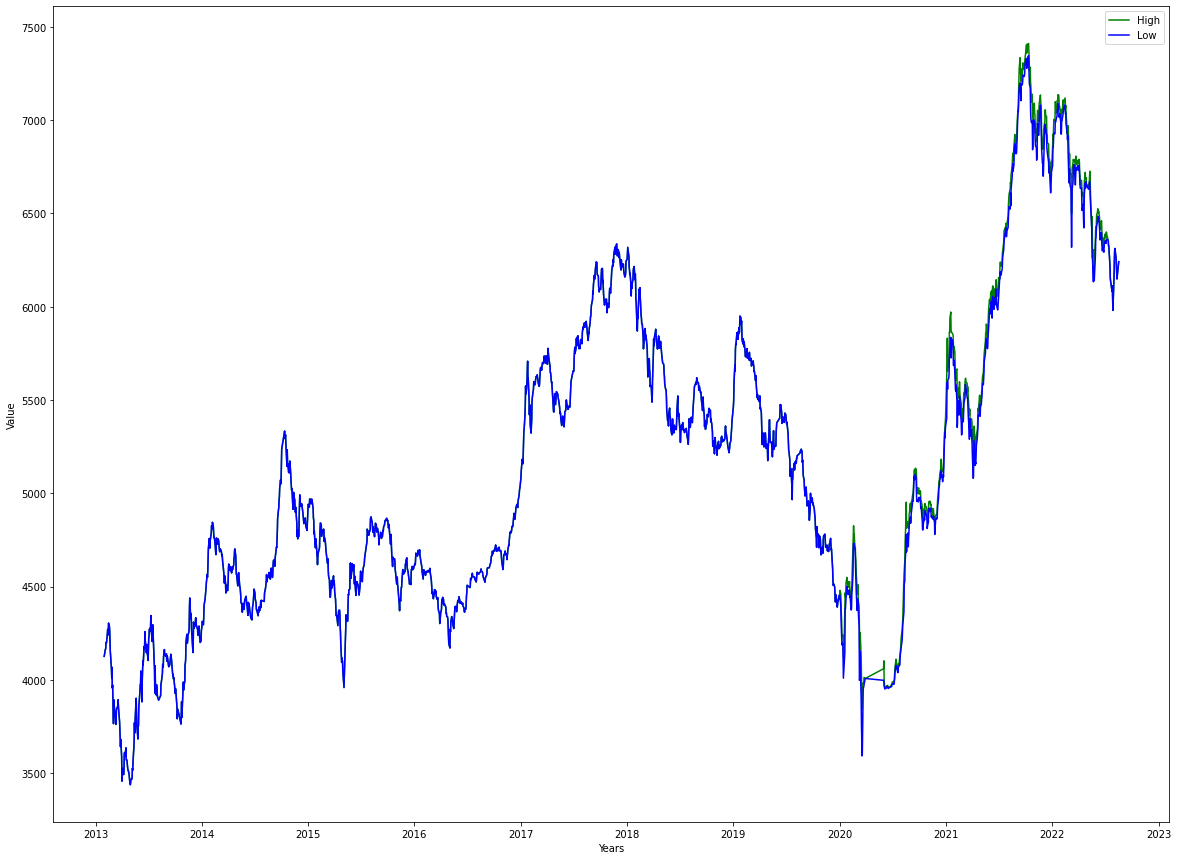

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(df_date, df['High'], color="green", label="High")
#plt.plot(df_date, df['Price'], color="red", label="Price")
plt.plot(df_date, df['Low'], color="blue", label="Low")
#plt.plot(df_date, df['Open'], color="gold", label="Open")
plt.xlabel('Years')
plt.ylabel('Value')
plt.legend(loc="upper right")
plt.show()

Data distribution

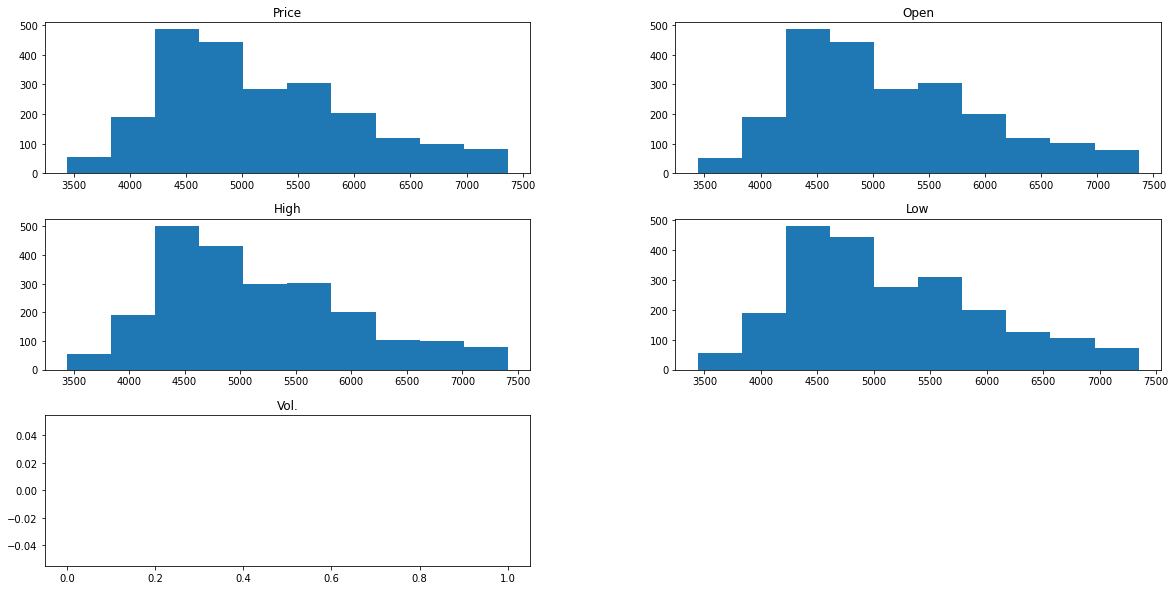

In [ ]:
df.hist(bins=10, grid = False, figsize=(20,10))
plt.show()

In [ ]:
price = np.array(df['Price'])
print("Price: Mean = %f, Standard deviation = %f" % (price.mean(), price.std()))

open = np.array(df['Open'])
print("Open: Mean = %f, Standard deviation = %f" % (open.mean(), open.std()))

high = np.array(df['High'])
print("High: Mean = %f, Standard deviation = %f" % (high.mean(), high.std()))

low = np.array(df['Low'])
print("Low: Mean = %f, Standard deviation = %f" % (low.mean(), low.std()))

Price: Mean = 5150.141596, Standard deviation = 843.103883
Open: Mean = 5149.430009, Standard deviation = 842.849316
High: Mean = 5159.276317, Standard deviation = 850.941221
Low: Mean = 5142.625946, Standard deviation = 837.813340


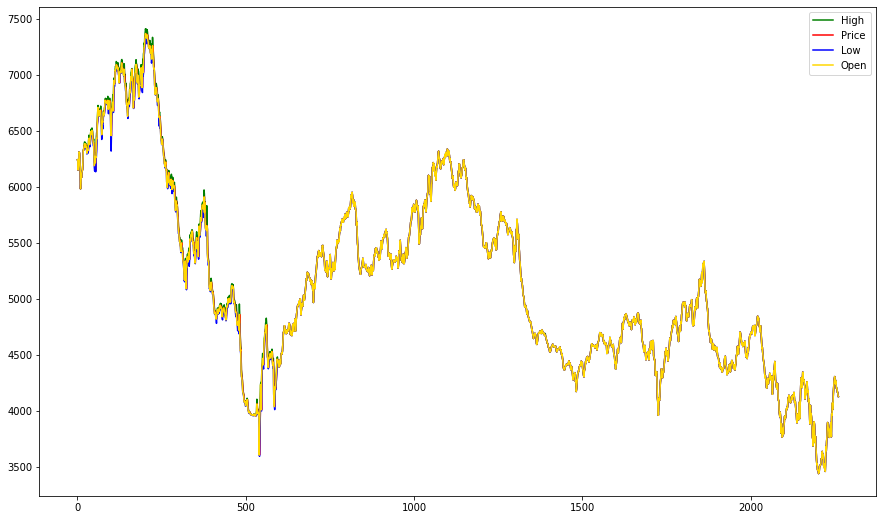

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(df['High'], color="green", label="High")
plt.plot(df['Price'], color="red", label="Price")
plt.plot(df['Low'], color="blue", label="Low")
plt.plot(df['Open'], color="gold", label="Open")
plt.legend(loc="upper right")
plt.show()


Features vs Value

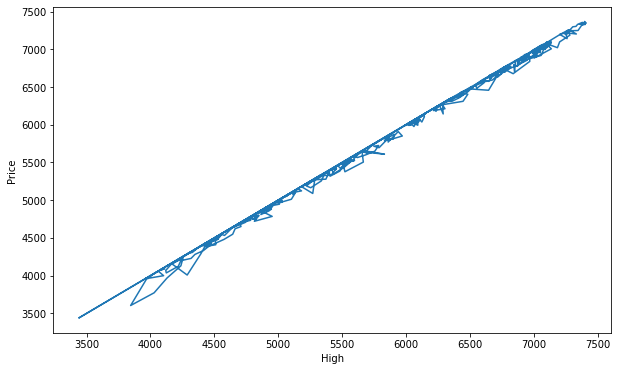

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['High'], df['Price'])
plt.xlabel('High')
plt.ylabel('Price')
plt.show()

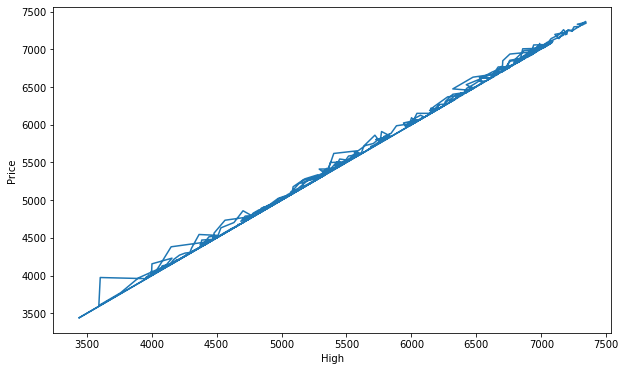

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['Low'], df['Price'], label='Price vs Low')
plt.xlabel('High')
plt.ylabel('Price')
plt.show()

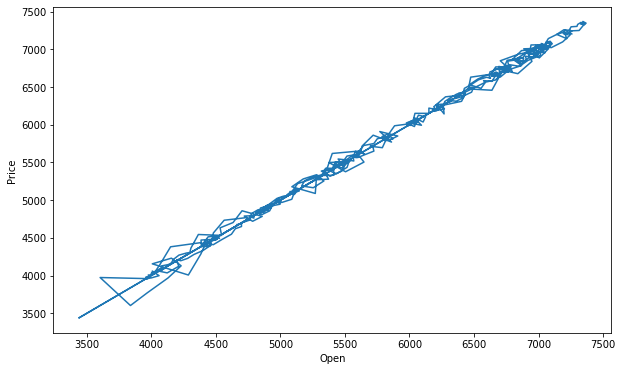

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['Open'], df['Price'])
plt.xlabel('Open')
plt.ylabel('Price')
plt.show()

##Linear Regression

10-fold Cross Validation for all features

regular train-test

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
yPred = model_lr.predict(X_test)
err_reg = mean_squared_error(y_test, yPred)
err_reg
print("Error: ", round(err_reg*100,2), "%")
Accuracy = 1-err_reg
print("Accuracy: ", round(Accuracy*100,2),"%")

Error:  0.0 %
Accuracy:  100.0 %


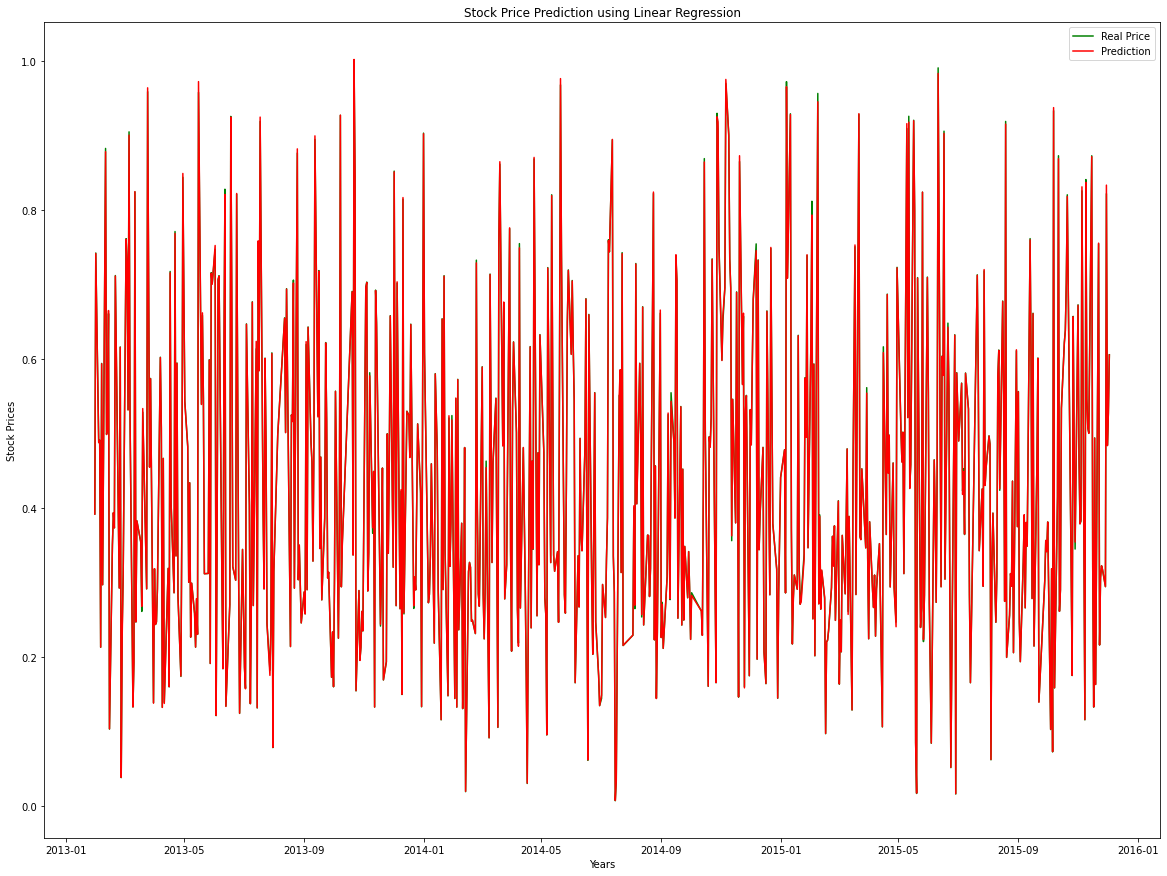

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(df_date[1583:2263], y_test, color="green", label="Real Price")
plt.plot(df_date[1583:2263], yPred, color="red", label="Prediction")
plt.xlabel('Years')
plt.ylabel('Stock Prices')
plt.title("Stock Price Prediction using Linear Regression")
plt.legend(loc="upper right")
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits=10)
results = cross_val_score(model_lr, X, y, cv=kfold, scoring='neg_mean_squared_error')
print(results)
print("Results: %f (%f) MSE" % (results.mean(), results.std()))

[-3.11230621e-05 -2.53871540e-05 -1.46813037e-05 -1.55109826e-07
 -4.38050061e-07 -2.56275121e-07 -1.58652756e-08 -8.85355196e-09
 -1.16410889e-08 -1.90396409e-07]
Results: -0.000007 (0.000011) MSE


10-fold CV for feature = 'Open'

In [ ]:
kfold = KFold(n_splits=10)
results = cross_val_score(model_lr, X_open_reshaped, y, cv=kfold, scoring='neg_mean_squared_error', error_score='raise')
print(results)
print("Results: %f (%f) MSE" % (results.mean(), results.std()))

[-1.56766454e-04 -1.61166092e-04 -1.98660909e-04 -3.39654454e-08
 -2.73978118e-08 -3.14090495e-08 -1.23409852e-07 -6.27309379e-08
 -5.98785969e-08 -1.28455634e-07]
Results: -0.000052 (0.000080) MSE


10-fold CV for features= 'High', 'Low'

In [ ]:
kfold = KFold(n_splits=10)
results = cross_val_score(model_lr, X_high_low, y, cv=kfold, scoring='neg_mean_squared_error', error_score='raise')
print(results)
print("Results: %f (%f) MSE" % (results.mean(), results.std()))

[-5.14763609e-05 -4.77618007e-05 -5.09831810e-05 -1.22975559e-08
 -5.25519354e-08 -2.73293802e-08 -1.84943215e-08 -1.07948290e-08
 -9.29960091e-09 -9.10314871e-08]
Results: -0.000015 (0.000023) MSE


## Support Vector Regressor

10-fold CV with all features

In [ ]:
from sklearn.svm import SVR
model_svm = SVR( kernel='rbf', gamma='scale', tol=0.001, C=1.0)

kfold = KFold(n_splits=10)
results = cross_val_score(model_svm, X, y, cv=kfold, scoring='neg_mean_squared_error')
print(results)
print("Results: %f (%f) MSE" % (results.mean(), results.std()))


[-0.01023285 -0.00310128 -0.00685243 -0.00098027 -0.00344433 -0.0026203
 -0.005091   -0.00481485 -0.00445409 -0.00568944]
Results: -0.004728 (0.002424) MSE


10-fold CV with Feature = 'Open'

In [ ]:
kfold = KFold(n_splits=10)
results = cross_val_score(model_svm, X_open_reshaped, y, cv=kfold, scoring='neg_mean_squared_error')
print(results)
print("Results: %f (%f) MSE" % (results.mean(), results.std()))

[-0.00997608 -0.00202813 -0.00695697 -0.00073626 -0.00266108 -0.00190578
 -0.00134419 -0.00130856 -0.00119407 -0.0052115 ]
Results: -0.003332 (0.002904) MSE


10-fold CV with Feature='High', 'Low'

In [ ]:
kfold = KFold(n_splits=10)
results = cross_val_score(model_svm, X_high_low, y, cv=kfold, scoring='neg_mean_squared_error')
print(results)
print("Results: %f (%f) MSE" % (results.mean(), results.std()))

[-0.01033815 -0.00327909 -0.00694323 -0.00109426 -0.00311983 -0.00264172
 -0.00749972 -0.00698746 -0.00655735 -0.00627999]
Results: -0.005474 (0.002676) MSE


regular train-test

In [ ]:
model_svm.fit(X_train, y_train)
pred = model_svm.predict(X_test)
err_svm = mean_squared_error(y_test, pred)
err_svm

0.004666412171846234

In [ ]:
Accuracy = 1-err_svm
print("Accuracy: ", round(Accuracy*100,2),"%")

Accuracy:  99.53 %


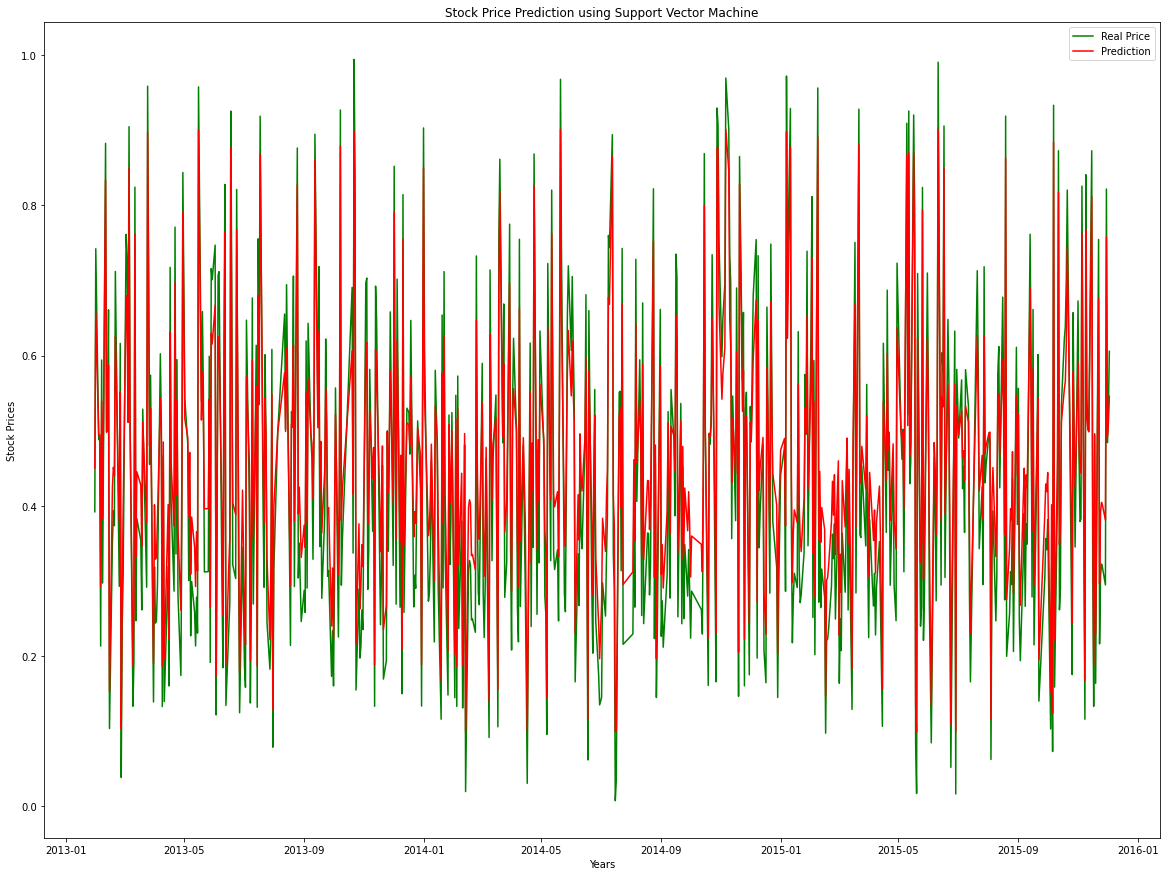

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(df_date[1583:2263], y_test, color="green", label="Real Price")
plt.plot(df_date[1583:2263], pred, color="red", label="Prediction")
plt.xlabel('Years')
plt.ylabel('Stock Prices')
plt.title("Stock Price Prediction using Support Vector Machine")
plt.legend(loc="upper right")
plt.show()

### cross grid search

In [ ]:
C_range    = np.logspace(-5, 3, 10)
gamma_range = np.logspace(-5, 1, 10)
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model_svm, param_grid={'C': C_range, 'gamma': gamma_range}, scoring='neg_mean_squared_error', cv=kfold)


regular train-test

In [ ]:
grid.fit(X_train, y_train)
pred = grid.predict(X_test)
err_svm = mean_squared_error(y_test, pred)
err_svm

0.0002526528150238182

In [ ]:
Accuracy = 1-err_svm
print("Accuracy: ", round(Accuracy*100,2),"%")

Accuracy:  99.97 %


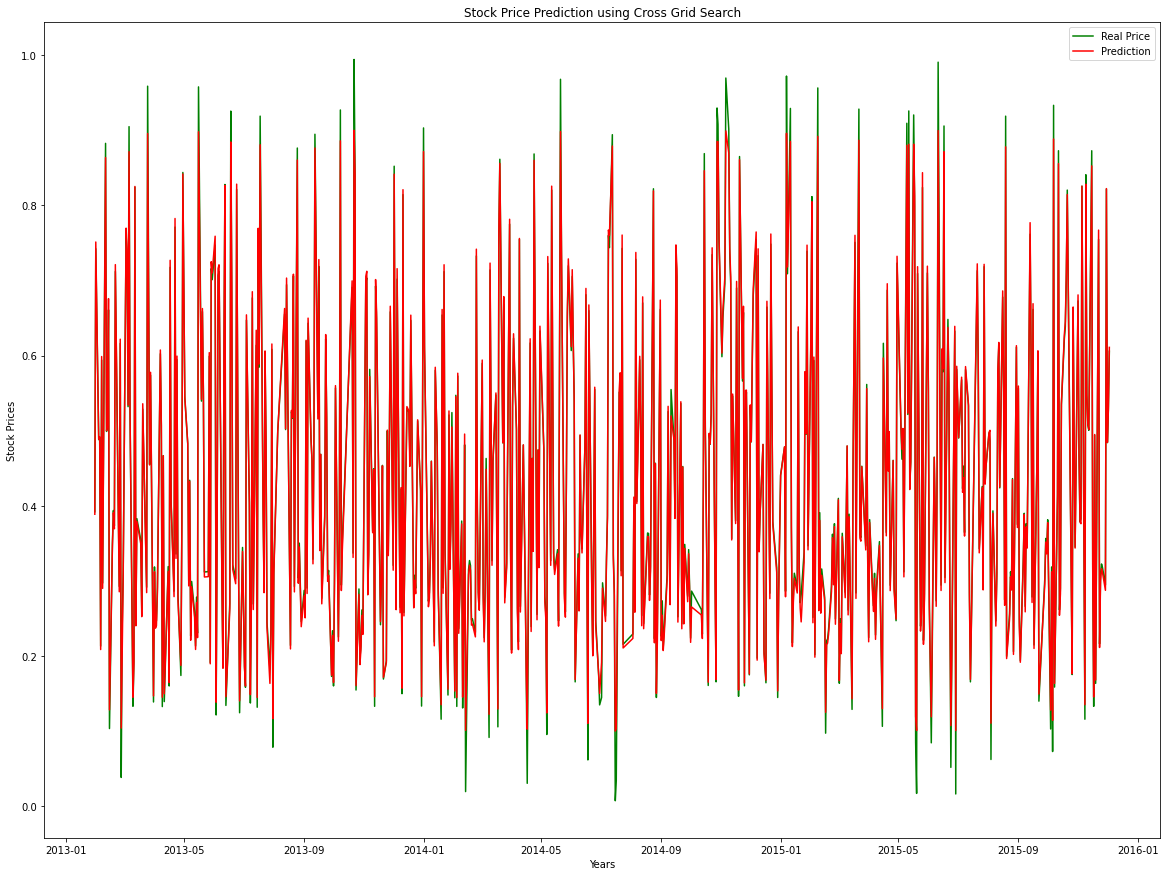

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(df_date[1583:2263], y_test, color="green", label="Real Price")
plt.plot(df_date[1583:2263], pred, color="red", label="Prediction")
plt.xlabel('Years')
plt.ylabel('Stock Prices')
plt.title("Stock Price Prediction using Cross Grid Search")
plt.legend(loc="upper right")
plt.show()

10-folds CV with all features

In [ ]:
kfold = KFold(n_splits=10)
results = cross_val_score(grid, X, y, cv=kfold, scoring='neg_mean_squared_error')
print(results)
print("Results: %f (%f) MSE" % (results.mean(), results.std()))

[-5.47298206e-03 -1.12678341e-04 -3.59717119e-04 -5.96293133e-06
 -3.47432898e-05 -2.17110464e-05 -4.63547694e-05 -3.86545529e-05
 -3.60698362e-05 -6.08077289e-03]
Results: -0.001221 (0.002284) MSE


10-folds CV with feature = "Open"

In [ ]:
kfold = KFold(n_splits=10)
results = cross_val_score(grid, X_open_reshaped, y, cv=kfold, scoring='neg_mean_squared_error')
print(results)
print("Results: %f (%f) MSE" % (results.mean(), results.std()))

[-5.28691963e-03 -3.26262984e-04 -3.49967169e-04 -6.61090284e-05
 -2.07039843e-04 -1.67548103e-04 -1.25507152e-04 -1.41005910e-04
 -1.19477883e-04 -6.64591727e-03]
Results: -0.001344 (0.002333) MSE


10-folds CV with feature = "High", "Low"

In [ ]:
kfold = KFold(n_splits=10)
results = cross_val_score(grid, X_high_low, y, cv=kfold, scoring='neg_mean_squared_error')
print(results)
print("Results: %f (%f) MSE" % (results.mean(), results.std()))

[-5.75814169e-03 -2.79036773e-04 -6.42237741e-04 -3.76532584e-06
 -5.46564897e-05 -2.49546646e-05 -2.39855574e-04 -2.00052365e-04
 -1.56377512e-04 -5.68764267e-03]
Results: -0.001305 (0.002216) MSE


## Artificial Neural Network

In [ ]:
!python -m pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# define base model
def baseline_model(dim1):
	# create model
	model = Sequential()
	model.add(Dense(3, input_shape=(dim1,), kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

10-folds CV with all features

In [ ]:
estimator = KerasRegressor(model=baseline_model(3), epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold, scoring='neg_mean_squared_error')
print(results)
print("Results: %f (%f) MSE" % (results.mean(), results.std()))

[-6.42476465e-05 -1.10262776e-04 -8.11224686e-05 -2.61290291e-06
 -9.06253599e-06 -5.41370686e-07 -2.95291794e-06 -8.81390563e-07
 -1.37952580e-06 -7.07566781e-05]
Results: -0.000034 (0.000040) MSE


10-folds CV with feature="Open"

In [ ]:
estimator = KerasRegressor(model=baseline_model(1), epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_open_reshaped, y, cv=kfold, scoring='neg_mean_squared_error')
print(results)
print("Results: %f (%f) MSE" % (results.mean(), results.std()))

[-1.61417993e-04 -1.76679245e-04 -2.01846824e-04 -7.09907496e-07
 -2.13840213e-05 -2.18983284e-06 -2.56725423e-06 -3.74547533e-06
 -3.07844301e-07 -3.35815224e-05]
Results: -0.000060 (0.000079) MSE


10-folds CV with features="High", "Low"

In [ ]:
estimator = KerasRegressor(model=baseline_model(2), epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_high_low, y, cv=kfold, scoring='neg_mean_squared_error')
print(results)
print("Results: %f (%f) MSE" % (results.mean(), results.std()))

[-0.21128234 -0.04010187 -0.04003461 -0.00942083 -0.04022211 -0.02186088
 -0.03006074 -0.02221108 -0.01907472 -0.10688748]
Results: -0.054116 (0.058255) MSE


## drawing loss curve

In [ ]:
model_ann = Sequential()
model_ann.add(Dense(3, input_shape=(3,), kernel_initializer='normal', activation='relu'))
model_ann.add(Dense(1, kernel_initializer='normal'))
# Compile model
model_ann.compile(loss='mean_squared_error', optimizer='adam')
hist1 = model_ann.fit(X_train, y_train, epochs=100, batch_size = 5, validation_data=(X_test,y_test))
hist1

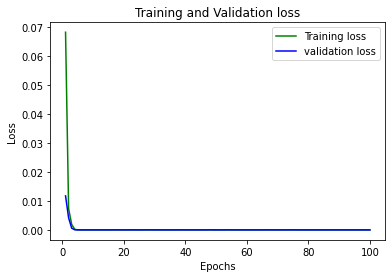

In [ ]:
loss_train = hist1.history['loss']
loss_val = hist1.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model_ann.fit(X_train,y_train)
yPred = model_ann.predict(X_test)
err_reg = mean_squared_error(y_test, yPred)
err_reg
print("Error: ", round(err_reg*100,2), "%")
Accuracy = 1-err_reg
print("Accuracy: ", round(Accuracy*100,2),"%")

50/50 [==============================] - 0s 3ms/step - loss: 2.0367e-05
Error:  0.0 %
Accuracy:  100.0 %


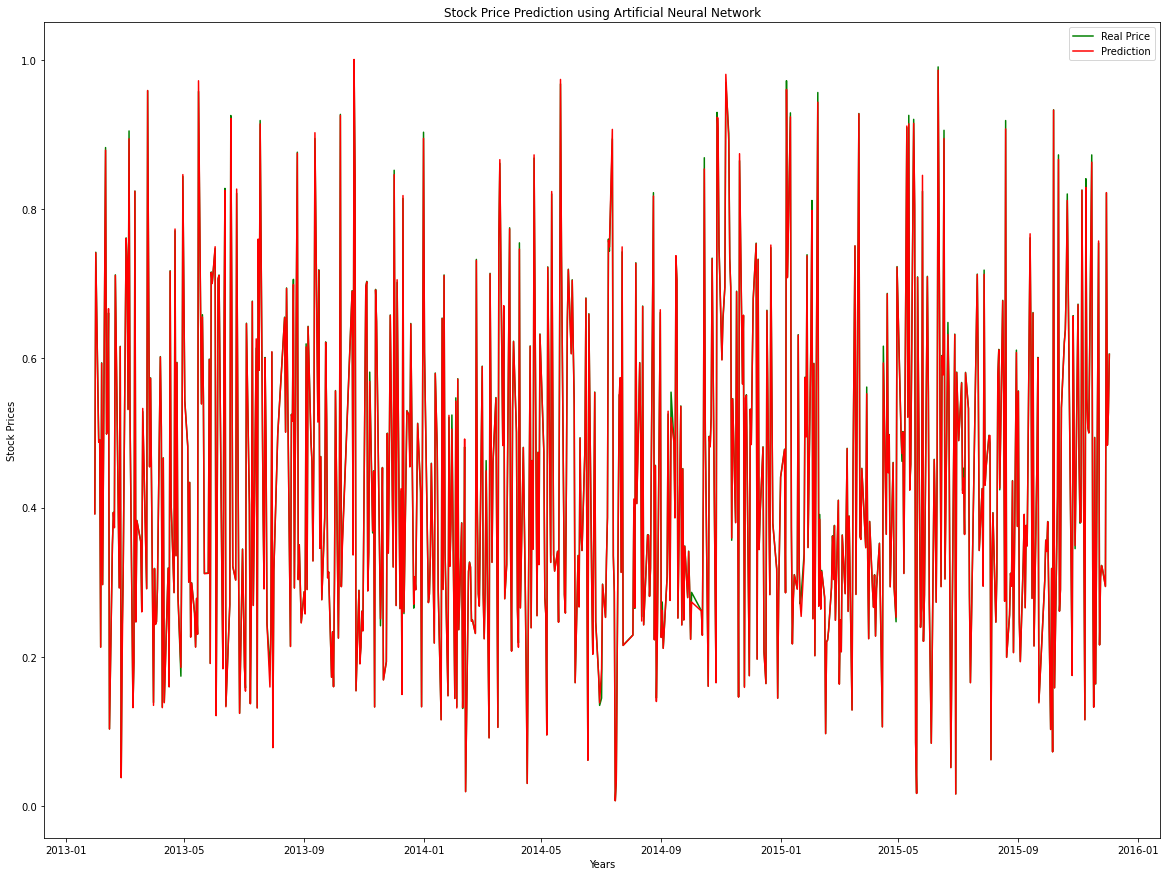

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(df_date[1583:2263], y_test, color="green", label="Real Price")
plt.plot(df_date[1583:2263], yPred, color="red", label="Prediction")
plt.xlabel('Years')
plt.ylabel('Stock Prices')
plt.title("Stock Price Prediction using Artificial Neural Network")
plt.legend(loc="upper right")
plt.show()

## Decision Tree

10-folds CV with all features

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()

kfold = KFold(n_splits=10)
results = cross_val_score(model_dt, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("Results: %f (%f) MSE" % (results.mean(), results.std()))

Results: -0.000130 (0.000205) MSE


10-folds CV with feature = "Open"

In [ ]:
kfold = KFold(n_splits=10)
results = cross_val_score(model_dt, X_open_reshaped, y, cv=kfold, scoring='neg_mean_squared_error')
print("Results: %f (%f) MSE" % (results.mean(), results.std()))

Results: -0.000375 (0.000721) MSE


10-folds CV with feature = "High", "Low"

In [ ]:
kfold = KFold(n_splits=10)
results = cross_val_score(model_dt, X_high_low, y, cv=kfold, scoring='neg_mean_squared_error')
print("Results: %f (%f) MSE" % (results.mean(), results.std()))

Results: -0.000119 (0.000203) MSE


In [ ]:
model_dt.fit(X_train,y_train)
yPred = model_dt.predict(X_test)
err_reg = mean_squared_error(y_test, yPred)
err_reg
print("Error: ", round(err_reg*100,2), "%")
Accuracy = 1-err_reg
print("Accuracy: ", round(Accuracy*100,2),"%")

Error:  0.0 %
Accuracy:  100.0 %


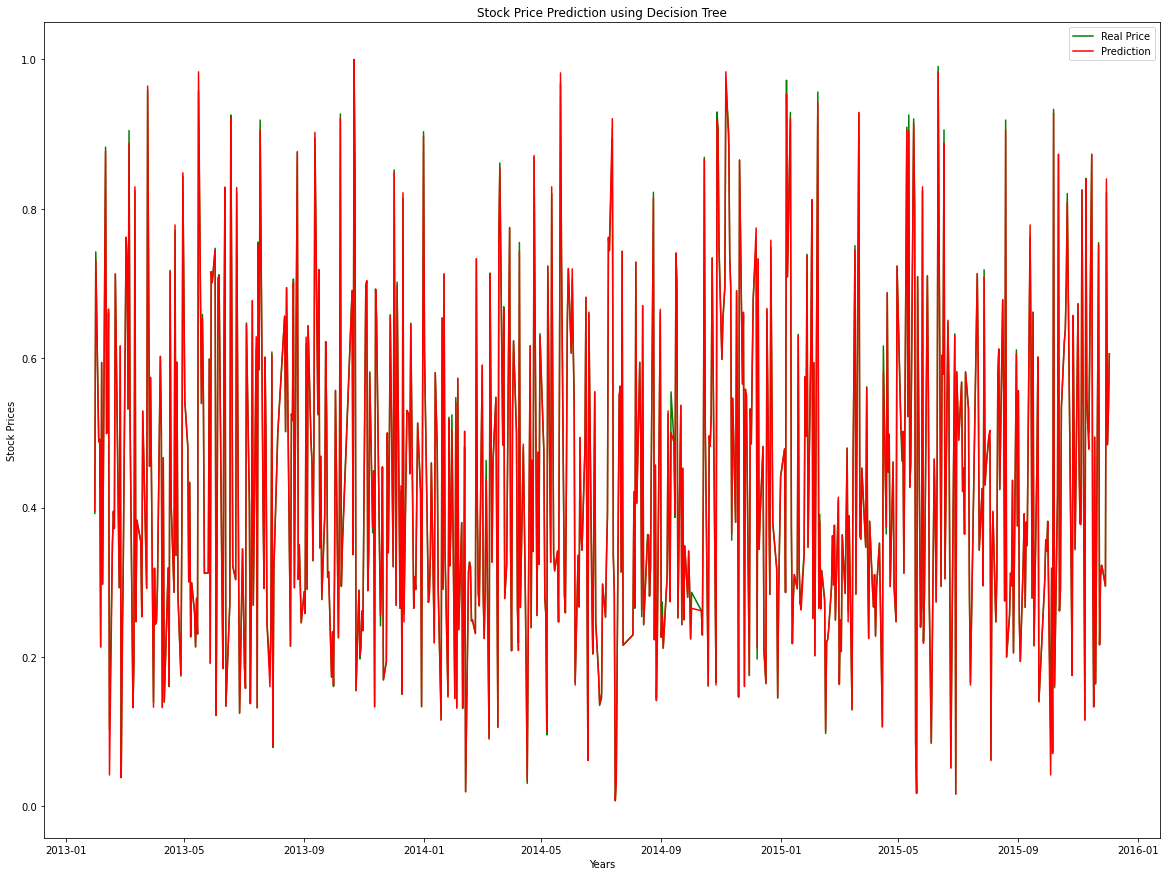

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(df_date[1583:2263], y_test, color="green", label="Real Price")
plt.plot(df_date[1583:2263], yPred, color="red", label="Prediction")
plt.xlabel('Years')
plt.ylabel('Stock Prices')
plt.title("Stock Price Prediction using Decision Tree")
plt.legend(loc="upper right")
plt.show()

## Random Forest

10-folds CV with all features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()

kfold = KFold(n_splits=10)
results = cross_val_score(model_rf, X, y, cv=kfold, scoring='neg_mean_squared_error')
print(results)
print("Results: %f (%f) MSE" % (results.mean(), results.std()))

[-4.77147383e-04 -7.69087308e-05 -9.25234540e-05 -1.13521838e-06
 -8.76779076e-07 -2.25585469e-07 -4.81522881e-08 -1.26624693e-07
 -2.18566669e-07 -5.42199541e-04]
Results: -0.000119 (0.000199) MSE


10-folds CV with feature = "Open"

In [ ]:
kfold = KFold(n_splits=10)
results = cross_val_score(model_rf, X_open_reshaped, y, cv=kfold, scoring='neg_mean_squared_error')
print(results)
print("Results: %f (%f) MSE" % (results.mean(), results.std()))

[-6.34645521e-04 -1.70902024e-04 -2.03256457e-04 -3.52630681e-05
 -2.19208914e-05 -2.09188666e-05 -1.39888207e-05 -1.16110029e-05
 -9.52941546e-06 -1.22465060e-03]
Results: -0.000235 (0.000377) MSE


10-folds CV with feature = "High", "Low"

In [ ]:
kfold = KFold(n_splits=10)
results = cross_val_score(model_rf, X_high_low, y, cv=kfold, scoring='neg_mean_squared_error')
print(results)
print("Results: %f (%f) MSE" % (results.mean(), results.std()))

[-4.86577849e-04 -4.93457753e-05 -5.23899404e-05 -6.09665655e-07
 -7.99199449e-07 -1.85933506e-07 -5.15309753e-08 -1.04781982e-07
 -1.55246617e-07 -2.81434182e-04]
Results: -0.000087 (0.000157) MSE


regular train-test

In [ ]:
model_rf.fit(X_train,y_train)
yPred = model_rf.predict(X_test)
err_reg = mean_squared_error(y_test, yPred)
err_reg
print("Error: ", round(err_reg*100,2), "%")
Accuracy = 1-err_reg
print("Accuracy: ", round(Accuracy*100,2),"%")

Error:  0.0 %
Accuracy:  100.0 %


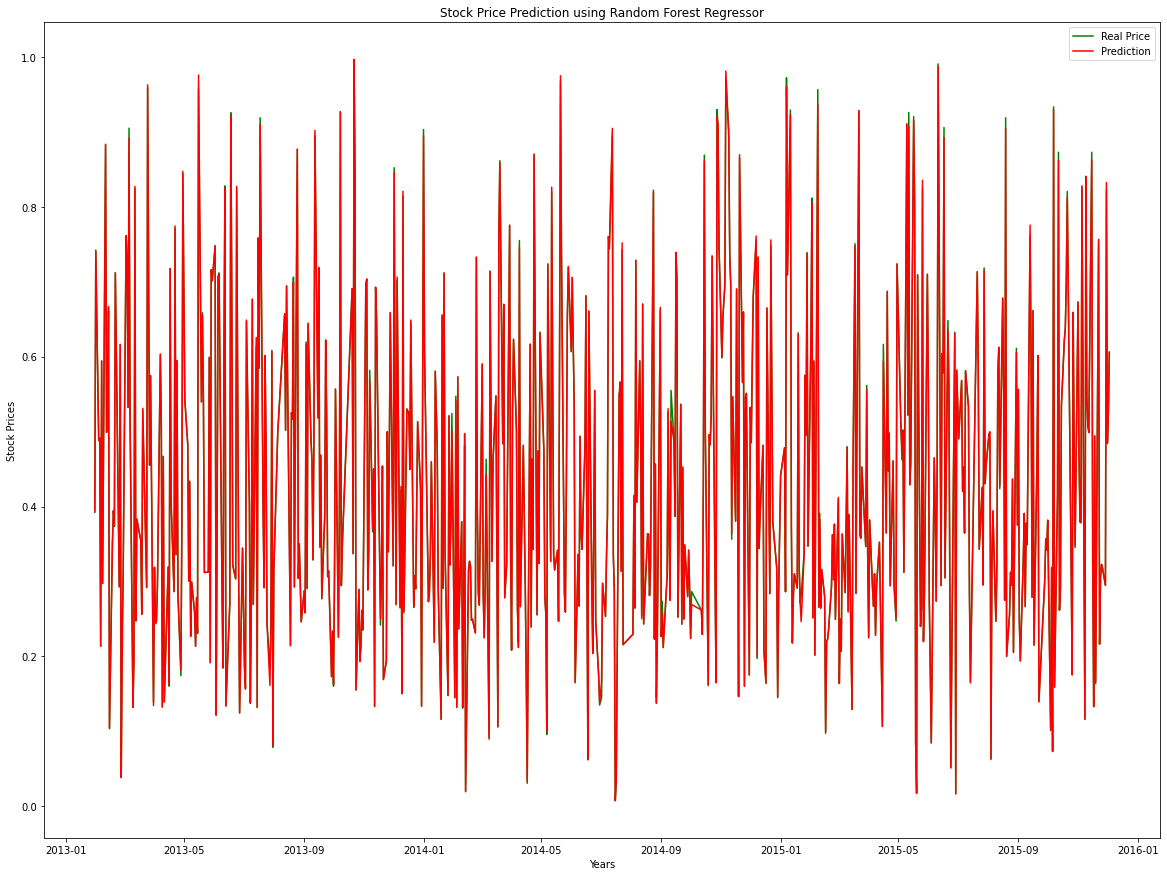

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(df_date[1583:2263], y_test, color="green", label="Real Price")
plt.plot(df_date[1583:2263], yPred, color="red", label="Prediction")
plt.xlabel('Years')
plt.ylabel('Stock Prices')
plt.title("Stock Price Prediction using Random Forest Regressor")
plt.legend(loc="upper right")
plt.show()

## LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from scikeras.wrappers import KerasRegressor

def lstm_model(dim1):
	# create model
  model = Sequential()
  model.add(LSTM(256, return_sequences=True, input_shape =(dim1,1), kernel_regularizer='l2', activation='relu'))
  model.add(LSTM(128, return_sequences=True, activation='relu'))
  model.add(LSTM(64, return_sequences=True, activation='relu'))

  model.add(LSTM(32, return_sequences=True, activation='relu'))

  model.add(LSTM(16))

  model.add(Dense(1, kernel_regularizer='l2'))
  model.compile(loss='mae', optimizer='adam', metrics=['mean_squared_error'])

  return model



10-folds CV with all features

In [ ]:
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [ ]:
model_lstm = KerasRegressor(model=lstm_model(3), epochs=30, batch_size=32, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(model_lstm, X, y, cv=kfold, scoring='neg_mean_squared_error')
print(results)
print("Results: %f (%f) MSE" % (results.mean(), results.std()))

[-2.16975994e-04 -1.48784442e-04 -1.60361954e-04 -1.07256842e-04
 -5.70364443e-05 -5.21966761e-05 -4.41524755e-07 -2.10696881e-05
 -3.69741196e-05 -8.11978267e-04]
Results: -0.000161 (0.000227) MSE


10-folds CV with feature = "Open"

In [ ]:
model_lstm = KerasRegressor(model=lstm_model(1), epochs=30, batch_size=32, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(model_lstm, X_open_reshaped, y, cv=kfold, scoring='neg_mean_squared_error')
print(results)
print("Results: %f (%f) MSE" % (results.mean(), results.std()))

[-4.39723496e-04 -1.88501579e-04 -2.07242589e-04 -6.22021826e-05
 -8.11198850e-05 -5.44207997e-06 -9.67106751e-06 -3.73064365e-05
 -1.09129591e-05 -5.97008506e-04]
Results: -0.000164 (0.000193) MSE


10-folds CV with features = "High", "Low"

In [ ]:
model_lstm = KerasRegressor(model=lstm_model(2), epochs=30, batch_size=32, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(model_lstm, X_high_low, y, cv=kfold, scoring='neg_mean_squared_error')
print(results)
print("Results: %f (%f) MSE" % (results.mean(), results.std()))

[-2.39991220e-04 -1.27952423e-04 -8.98564118e-05 -2.13563129e-05
 -8.93024179e-05 -1.78894564e-06 -2.07867790e-05 -2.93307416e-04
 -1.31418153e-06 -6.20302499e-04]
Results: -0.000151 (0.000183) MSE


### performance visualization


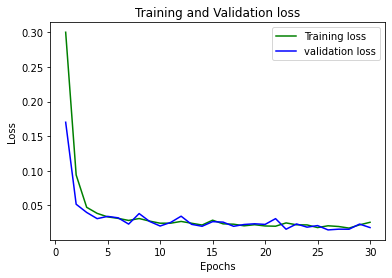

In [ ]:
stockModel = lstm_model(3);
hist2 = stockModel.fit(X_train, y_train, epochs=30, batch_size = 32,validation_data=(X_test,y_test))

loss_train = hist2.history['loss']
loss_val = hist2.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(256, return_sequences=True, input_shape =(3,1), kernel_regularizer='l2', activation='relu'))
LSTM_model.add(LSTM(128, return_sequences=True, activation='relu'))
LSTM_model.add(LSTM(64, return_sequences=True, activation='relu'))

LSTM_model.add(LSTM(32, return_sequences=True, activation='relu'))

LSTM_model.add(LSTM(16))

LSTM_model.add(Dense(1, kernel_regularizer='l2'))
LSTM_model.compile(loss='mae', optimizer='adam', metrics=['mean_squared_error'])

LSTM_model.fit(X_train,y_train)
yPred = LSTM_model.predict(X_test)
err_reg = mean_squared_error(y_test, yPred)
err_reg
print("Error: ", round(err_reg*100,2), "%")
Accuracy = 1-err_reg
print("Accuracy: ", round(Accuracy*100,2),"%")

50/50 [==============================] - 7s 37ms/step - loss: 0.3193 - mean_squared_error: 0.1312
Error:  3.14 %
Accuracy:  96.86 %


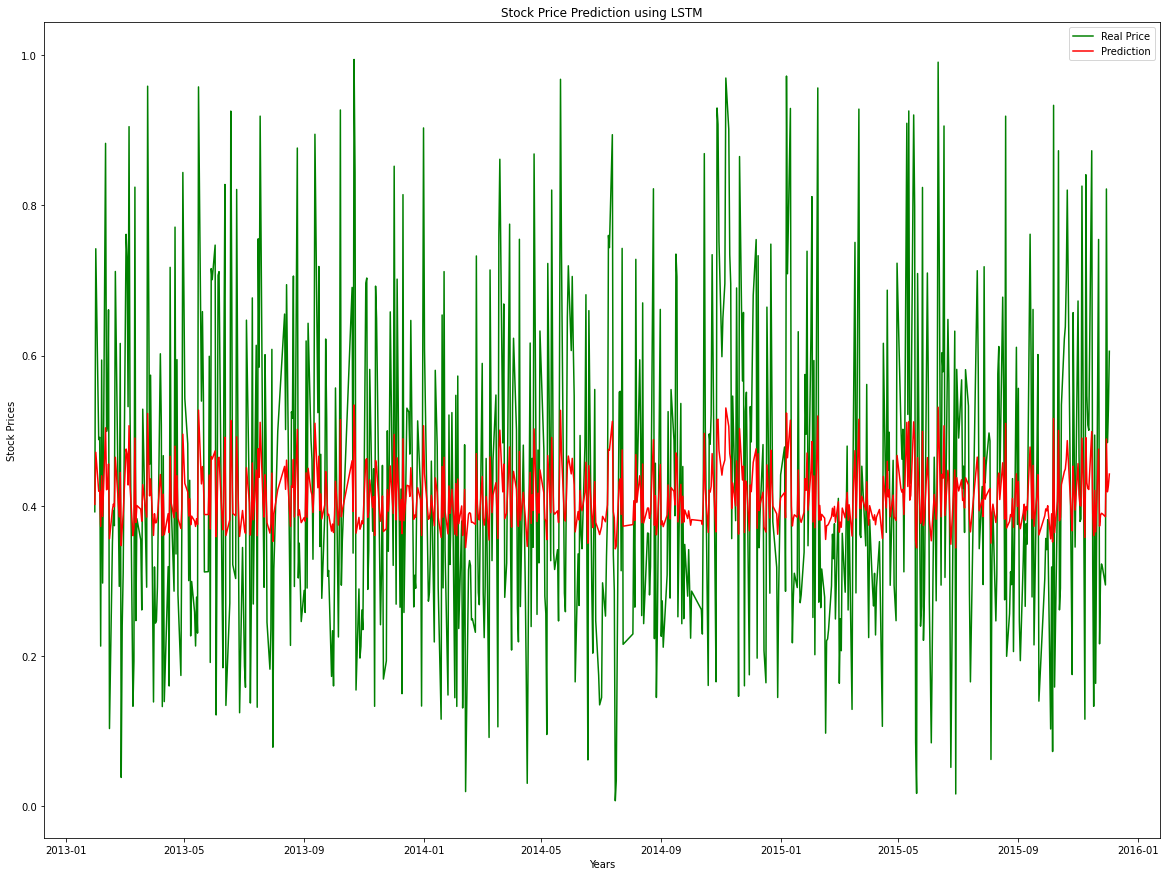

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(df_date[1583:2263], y_test, color="green", label="Real Price")
plt.plot(df_date[1583:2263], yPred, color="red", label="Prediction")
plt.xlabel('Years')
plt.ylabel('Stock Prices')
plt.title("Stock Price Prediction using LSTM")
plt.legend(loc="upper right")
plt.show()